In [32]:
import sys

# setting path
sys.path.append('..')

import matplotlib.pyplot as plt
import numpy as np

from paralling_testing_framework import run_parallel, params

In [33]:
params_Q_alfa_01 = params.copy()
params_Q_alfa_01["alfa"] = 0.1
params_Q_alfa_01["implementation"] = "Q_Learning"  

params_Q_ck_01 = params.copy()
params_Q_ck_01["alfa"] = 0.1  
params_Q_ck_01["implementation"] = "Q_Learning_ck"

params_Q_colf_01 = params.copy()
params_Q_colf_01["alfa"] = 0.1  
params_Q_colf_01["implementation"] = "Q_Learning_colf"

params_Q_ck_colf_01 = params.copy()
params_Q_ck_colf_01["alfa"] = 0.1  
params_Q_ck_colf_01["implementation"] = "Q_Learning_CK_COLF"

_params = [params_Q_alfa_01, params_Q_ck_01, params_Q_colf_01, params_Q_ck_colf_01]

results = run_parallel(_params)


100%|██████████| 10000/10000 [02:50<00:00, 58.60it/s]


In [34]:
results

[[0.14,
  0.1611111111111111,
  0.12000000000000001,
  0.12000000000000001,
  0.12111111111111113,
  0.10888888888888891,
  0.11444444444444442,
  0.15000000000000002,
  0.12555555555555553,
  0.13777777777777778,
  0.1288888888888889,
  0.11555555555555552,
  0.12333333333333334,
  0.12333333333333334,
  0.13222222222222224,
  0.14666666666666664,
  0.12000000000000004,
  0.14555555555555555,
  0.11444444444444442,
  0.15555555555555559,
  0.13222222222222227,
  0.1311111111111111,
  0.10444444444444441,
  0.12555555555555553,
  0.12444444444444441,
  0.11444444444444445,
  0.12111111111111113,
  0.14333333333333334,
  0.1211111111111111,
  0.14444444444444446,
  0.11888888888888889,
  0.12444444444444447,
  0.1022222222222222,
  0.11777777777777777,
  0.11888888888888888,
  0.12333333333333334,
  0.13888888888888887,
  0.10111111111111111,
  0.13999999999999999,
  0.15,
  0.11888888888888889,
  0.10888888888888888,
  0.19111111111111112,
  0.14444444444444443,
  0.14222222222222225,


In [35]:
my_array = np.array(results)

my_array.shape

(4, 10000)

In [36]:
transposed_array = np.transpose(my_array)

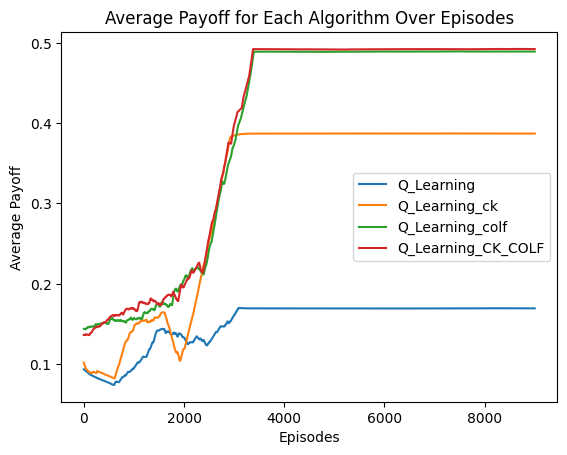

In [37]:
# Calculate the average payoff for each algorithm
# average_payoffs = np.mean(average_payoffs, axis=0)

# Transpose the array for plotting
# average_payoffs = np.transpose(average_payoffs)

# Set the window size for smoothing the plot
window_size = 1000

# Create a plot
fig, ax = plt.subplots()

# List of tuples, each containing the relevant imports
implementations = [
    ("Q_Learning"),
    ("Q_Learning_ck"),
    ("Q_Learning_colf"),
    ("Q_Learning_CK_COLF")
]

# Plot each line for different algorithms with smoothing
for i, algo_name in enumerate(implementations):
    smoothed_values = np.convolve(transposed_array[:, i], np.ones(window_size)/window_size, mode='valid')
    ax.plot(smoothed_values, label=algo_name)

# Set labels and title
ax.set_xlabel('Episodes')
ax.set_ylabel('Average Payoff')
ax.set_title('Average Payoff for Each Algorithm Over Episodes')

# Add legend
ax.legend()

# Show the plot
plt.show()